# Using MLE to find Weibull parameters on wind distributions

## Index:


* ###  1. Introduction
* ###  2. Data loading and first overview
* ###  3. Probability distribution
* ###  4. Visualization of the Probability Distribution Functions
* ###  5. MLE Method
* ###  6. Power curve

## 1. Introduction 

In this project I use MLE methods to find the Weibull distribution parameters of two wind distribution of different locations. Once the Weibull parameters are estimated, I classified the different wind profiles in on-shore or off-shore configurations.


### 1.1 Wind turbines

There are several different types of wind turbines, including horizontal axis wind turbines and vertical axis wind turbines.
Horizontal axis wind turbines (HAWT) are the most common type of wind turbine and are characterized by their long, horizontal blades. These turbines have a rotor with a horizontal axis of rotation, and the blades are mounted on a horizontal shaft that is perpendicular to the tower. The blades are designed to capture the wind and convert its energy into rotational energy, which is then used to generate electricity. HAWTs are typically used in large wind farms and are capable of generating a significant amount of electricity.

Vertical axis wind turbines (VAWT) are characterized by their vertical axis of rotation and their vertical blades. The blades of a VAWT are mounted on a vertical shaft, which is parallel to the tower. VAWTs are less common than HAWTs and are typically used in small-scale wind energy systems. They are less efficient at generating electricity than HAWTs, but they have several advantages, including being more compact and easier to install.

Other types of wind turbines include Darrieus wind turbines, which are vertical axis wind turbines with a curved blade design, and Savonius wind turbines, which are vertical axis wind turbines with a simple, scoop-like blade design. 

The wind turbines described throughout this project are all HAWT.

### 1.2 Weibull distributions

Weibull distributions are a random variable type of distribution that, amongst other things, can be used to model and adjust the wind distribution of a given location. Accurately finding the parameters and thus performing a great adjustment of the curve is relevant in terms of accurate energy prediction. Weibull parameters in wind distributions are commonly taken into account for the selection of the wind turbine model as well as the design of wind farms. Different wind turbine models present different features with different wind operational ranges and different power output curves. Effectively, energy generation is always the factor to be maximized. 

The Weibull distribution is often used in reliability engineering, as it can model both accelerating and decelerating failure rates, and it can accurately fit a wide range of data sets. It is also often used in other fields, such as finance, economics, and the social sciences, to model the occurrence and timing of events.

### 1.3 Motivation to accurately estimate Weibull parameters

1. Better annual energy predictions
2. Optimal energy production
3. Minimizing economic losses
4. Better global coordination with Smart Grids 


<div>
<img src="https://i.imgur.com/ZcRLBqy.jpg" width="1300"/>
</div>

## 2. Data loading and first overview

The data is stored in `.csv` files containing a single column with the total number of hours per year for each given wind speed. The wind data is distributed from 1 to 33 m/s. Which means the first row at index `0` actually accounts for the total annual hours of wind recorded at 1 m/s. The reason why there is no data collected for 0 m/s is because of the fact that it is irrelevant to the energy production since the wind speed needs to be larger than 0 m/s. 


### 2.1 Loading the data

First we have to load the necessary libraries. 

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# setting white grid background
sns.set_style('whitegrid')
#%matplotlib notebook
%matplotlib inline

The next step is to access the wind distribution data set and load the data.

### 2.2 Overview of the data

In [2]:
df1 = pd.read_csv(r'wind_1.csv')
df2 = pd.read_csv(r'wind_2.csv')

#### 2.2.1 First data set (wind_1.csv) 

In [3]:
df1

,Hours per year [h]
0,134.99
1,263.76
2,380.58
3,480.59
4,560.19
5,617.19
6,650.92
7,662.12
8,652.77
9,625.81


We have a quick look at some statistics of the data set.

In [4]:
df1.describe()

,Hours per year [h]
count,33.000000
mean,265.066667
std,244.876858
min,0.950000
25%,26.540000
50%,197.850000
75%,480.590000
max,662.120000


As we discussed before, we need to shift the data from the dataset to match with the corresponding index values

In [5]:
df1=df1.shift(1)

In [6]:
df1.index

RangeIndex(start=0, stop=33, step=1)

In [7]:
df1.head()

,Hours per year [h]
0,NaN
1,134.99
2,263.76
3,380.58
4,480.59


Now our data in the ``Hours per year`` colum matches the wind speed displayed by the index values. Next, we will create a new column containing the index values.

In [8]:
df1["wind_speed"]=df1.index

In [9]:
df1.head()

,Hours per year [h],wind_speed
0,NaN,0
1,134.99,1
2,263.76,2
3,380.58,3
4,480.59,4


We drop the first row since we will not be working with the 0 m/s wind speed value

In [10]:
df1=df1.drop(df1.index[0])

In [11]:
df1.head()

,Hours per year [h],wind_speed
1,134.99,1
2,263.76,2
3,380.58,3
4,480.59,4
5,560.19,5


We rename the `Hours per year` column to `annual_h`

In [12]:
df1 = df1.rename(columns={'Hours per year [h]': 'annual_h'})

In [13]:
df1.head()

,annual_h,wind_speed
1,134.99,1
2,263.76,2
3,380.58,3
4,480.59,4
5,560.19,5


#### 2.2.2 Second data set (wind_2.csv) 

In [14]:
df2.head()

,Wind speed [m/s],Hours per year [h]
0,1,331.83
1,2,617.99
2,3,836.33
3,4,971.76
4,5,1021.60


We rename the columns

In [15]:
df2 = df2.rename(columns={'Hours per year [h]': 'annual_h',"Wind speed [m/s]":"wind_speed"})

In [16]:
df2.head()

,wind_speed,annual_h
0,1,331.83
1,2,617.99
2,3,836.33
3,4,971.76
4,5,1021.60


We swap the columns in the same order as the first wind distribution

In [17]:
df2=df2[["annual_h","wind_speed"]]
df2.head()

,annual_h,wind_speed
0,331.83,1
1,617.99,2
2,836.33,3
3,971.76,4
4,1021.60,5


### 2.3 Wind distributions

We plot the annual hours distribution. We can observe the following distributions clearly follow a Weibull patter in both of our data sets.

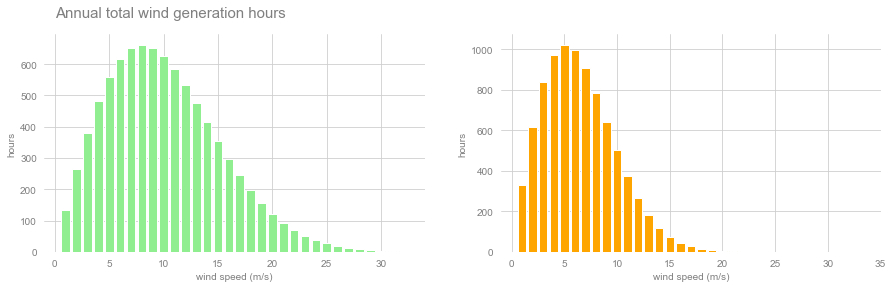

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                        figsize=(15,4))
ax1.bar(df1['wind_speed'],
        df1['annual_h'],
        color='#90EE90')

ax2.bar(df2['wind_speed'],
        df2['annual_h'],
        color='#FFA500')
for location in ['left', 'right', 'top', 'bottom']:
    ax1.spines[location].set_visible(False)
    ax2.spines[location].set_visible(False)
    
for ax in [ax1, ax2]:
    ax.tick_params(top=False, left=False)
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    ax.set_xlabel("wind speed (m/s)", color="grey")
    ax.set_ylabel("hours", color="grey")
    
ax1.text(x=0, y=750,
        s='Annual total wind generation hours',
        weight='normal', size=15, color= "grey")

plt.show()

## 3. Probability distribution

The probability density function of a Weibull random variable is defined by the following expression.

<div>
<img src="https://i.imgur.com/yENhgsV.png" width="450"/>
</div>

where x is the random variable, λ is the scale parameter, and k is the shape parameter.

### 3.1 Shape and scale parameters of the Weibull distribution
The Weibull distribution is defined by two parameters: shape and scale. The shape parameter determines the shape of the distribution, and the scale parameter determines the location and spread of the distribution. The Weibull distribution is often used to model the failure times of materials, components, and systems, as it can accurately describe a wide range of failure rates and shapes.

In order to find the parameters that define our Weibull curve we need to convert our datasets in terms of probability. To do so we will have to divide each value on the `annual_h` column by the total sum of hours recorded for all the different wind speeds. By probability definitions the cumulative frequency of both distributions must add up to 1, we will check that as well.

### 3.2 Defining the probability

#### 3.2.1 First wind distribution


In [19]:
annual_sum_1=df1["annual_h"].sum()
annual_sum_1

8746.25

In [20]:
df1["probability"]=df1["annual_h"]/annual_sum_1
df1.head()

,annual_h,wind_speed,probability
1,134.99,1,0.015434
2,263.76,2,0.030157
3,380.58,3,0.043514
4,480.59,4,0.054948
5,560.19,5,0.064049


In [21]:
df1.probability.sum()

0.9999999999999999

#### 3.2.2 Second wind distribution

In [22]:
annual_sum_2=df2["annual_h"].sum()
annual_sum_2

8730.59

In [23]:
df2["probability"]=df2["annual_h"]/annual_sum_2
df2.head()

,annual_h,wind_speed,probability
0,331.83,1,0.038008
1,617.99,2,0.070784
2,836.33,3,0.095793
3,971.76,4,0.111305
4,1021.60,5,0.117014


In [24]:
df2.probability.sum()

1.0

We check that the sum of probabilities for both distributions is indeed equal to `1`.

## 4. Visualization of the Probability Distribution Functions

### 4.1 OOP for data visualization
Object-oriented programming (OOP) involves organizing code into objects. In OOP, each object has its own set of data (attributes) and behaviors (methods) that it can perform.

Matplotlib is a Python library that allows us to create visualizations of data. It can be used to create line plots, scatter plots, bar plots, etc. In Matplotlib, we can use the object-oriented interface to create plots. This means that we create an instance of a plot type (such as a Figure or Axes object), and then use methods of that instance to customize the plot. For example, we can create a Figure object, which represents a single figure (or plot) in our visualization, and then use methods of the Figure object to add subplots, customize the axis labels, and so on.

We plot both probability distributions together into one same plot of 1 row and 2 columns. We delete the spines for both plots set a new light tone color for the tick parameters. We highlight the wind speed for the largest probability by creating vertical lines and modifying their attributes. Finally we add a text note to numerically indicate the highest speed.

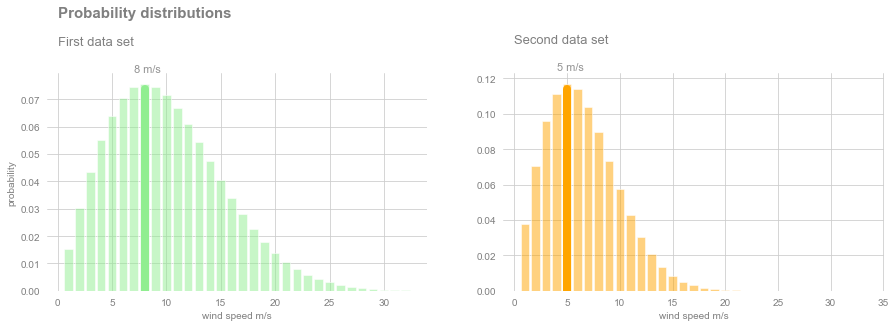

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                        figsize=(15,4))

ax1.bar(df1['wind_speed'],
        df1['probability'],
        color='#90EE90', alpha=0.5)

ax2.bar(df2['wind_speed'],
        df2['probability'],
        color='#FFA500', alpha= 0.5)

ax1.axvline(x = 8, color = '#90EE90', alpha=1, linewidth=8, ymin=0, ymax=df1["probability"][7]*10/0.8)
ax2.axvline(x = 5, color = '#FFA500', alpha=1, linewidth=8, ymin=0, ymax=df2["probability"][4]*7.95)

ax1.text(7, 0.08, '8 m/s', size=11, alpha = 0.5)
ax1.set_xlabel("wind speed m/s", color="grey")
ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')
ax2.text(4, 0.125, '5 m/s', size=11, alpha = 0.5)
ax1.set_ylabel("probability", color="grey")

ax1.text(0, 0.09, "First data set", size=13, color="grey")

ax2.text(0, 0.14, "Second data set", size=13, color="grey")
ax2.tick_params(axis='x', colors='grey')
ax2.set_xlabel("wind speed m/s", color="grey")
ax2.tick_params(axis='y', colors='grey')
ax1.text(0, 0.1, "Probability distributions", size=15, color="grey", weight= "bold")

for location in ['left', 'right', 'top', 'bottom']:
    ax1.spines[location].set_visible(False)
    ax2.spines[location].set_visible(False)

### 4.2 Comparison of the distributions

The Weibull distribution is characterized by two parameters: the shape parameter, k, and the scale parameter, λ. The shape parameter determines the shape of the distribution, and the scale parameter determines the location of the distribution.

The shape of the distribution changes as the shape parameter k is varied. When k < 1, the distribution is very skewed, with a long tail on the right. When k = 1, the distribution is exponential. When 1 < k < 2, the distribution is slightly skewed. When k = 2, the distribution is symmetrical. When k > 2, the distribution is slightly skewed, with a long tail on the left.

The scale parameter λ determines the location of the distribution. As λ increases, the distribution shifts to the right.


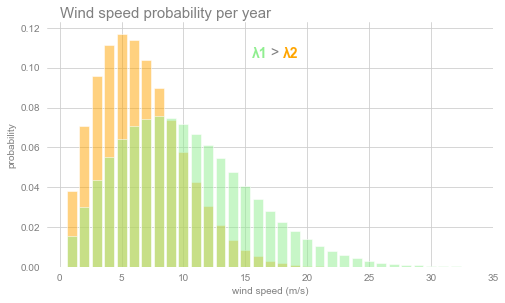

In [26]:
fig, ax = plt.subplots(figsize=(8,4.5))
ax.bar(df2['wind_speed'],
        df2['probability'],
        color='#FFA500', alpha=0.5)

ax.bar(df1['wind_speed'],
        df1['probability'],
        color='#90EE90', alpha=0.5)

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
    
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.text(x=0, y=0.125,
        s='Wind speed probability per year',
        weight='normal', color= "grey",size=15)

ax.set_xlabel("wind speed (m/s)", color="grey")
ax.set_ylabel("probability", color="grey")

ax.text(x=18, y=0.105, s='λ2', weight='bold', color= "#FFA500",size=14)
ax.text(x=17, y=0.105, s='>', weight='normal', color= "grey",size=14)
ax.text(x=15.5, y=0.105, s='λ1', weight='bold', color= "#90EE90",size=14)

plt.show()

As we plot both wind distributions together we can observe that the second distribution is somewhat more skewed to the left as well as having the median value located further to the left. This leads to the assumption that the λ parameter will be larger on the first distribution. We will be checking this assumption on the upcoming section.

## 5. MLE Method

The maximum likelihood estimator (MLE) is a statistical method that is used to estimate the parameters of a statistical model. In the context of wind turbine modeling, the MLE might be used to estimate the parameters of a statistical model that describes the performance of a wind turbine under different wind conditions.

To use the MLE to estimate the parameters of a wind distribution, we need a dataset of wind turbine performance data that includes information about the wind conditions and the corresponding turbine performance. Then we will use an optimization algorithm to find the set of model parameters that maximize the likelihood of the data given the model.

The MLE is a popular method for estimating the parameters of statistical models because it has several desirable properties, such as asymptotic efficiency, meaning that it is the most efficient estimator in large sample sizes, and consistency which translates to the fact that the estimator converges to the true value of the parameter as the sample size increases.

It is important to note that the MLE is only one of many methods that can be used to estimate the parameters of a statistical model. Other methods include the method of moments and the Bayesian method which I will not discuss in this project. 

### 5.1 Mathematical resolution of the MLE

Para la resolución de esta práctica se ha utilizado el software Matlab, que mediante la
exportación de los datos desde un fichero Excel calcula los diferentes parámetros de la
distribución de Weibull, necesarios para obtener la función de la distribución de densidad
del viento (1).

En primer lugar, se han introducido los datos de las velocidades del viento en un archivo
Excel, utilizando una única columna. Se ha estimado sobre un total de 1000 horas, la
cantidad entera de horas que correspondería a cada uno de los valores de velocidad en
el rango [0-33] m/s. Se han obviado los valores de velocidad nulos. Mediante el código
de Matlab mostrado a continuación se han calculado los parámetros de la distribución
Weibull. Parámetro de forma, k y parámetro de escala, TEST

Para resolver y computar los parámetros de Weibull se han utilizado modelos
matemáticos de inferencia estadística que se presentan a continuación. Para una
muestra aleatoria simple tenemos la expresión (2), donde 𝑇𝑖 es el vector de la muestra
aleatoria con los valores medidos de velocidad en los archivos Excel y 𝐿(𝜃) representa
la función de verosimilitud, con el estimador 𝜃 de máxima verosimilitud.

The maximum likelihood estimator (MLE) is a well known estimator. It is defined by
treating our parameters as unknown values and finding the joint density of all observations
of a data set, which are assumed to be independent and identically distributed (iid). Once the
likelihood function is defined, the maximum of that function is found. If the data points are
all highly likely under specific parameter values, then their product will be the “most likely”
outcome, or the maximum likelihood. This estimator is important in statistics because of is
asymptotic unbiasedness and minimal variance.
Our MLE is computed by first assuming that Xi
iid
∼ Weibull(λ, k), with the probability given by its density function:

<div>
<img src="https://i.imgur.com/yENhgsV.png" width="450"/>
</div>

The joint density of the likelihood is the product of the densities of each data point.

<div>
<img src="https://i.imgur.com/MYeNLsR.png" width="450"/>
</div>

In order to make the math somewhat simpler, the natural log of our joint density is computed.
This can be done while still preserving the true maximum of our likelihood function because the log transformation is a monotonically increasing function.

<div>
<img src="https://i.imgur.com/J5IskqM.png" width="620"/>
</div>

Once the likelihood function has been obtained, the function is optimized by negating it
and finding its minimum. This is done iteratively using an optimization function `minimize` from the scipy ``library``.

Differentiating the above equation with respect to ``k`` and ``λ`` and equating to zero, we have:

<div>
<img src="https://i.imgur.com/U2djKJu.png" width="120"/>
</div>

<div>
<img src="https://i.imgur.com/MVtUgf6.png" width="500"/>
</div>

<div>
<img src="https://i.imgur.com/Frbaism.png" width="200"/>
</div>

### 5.2 MLE with Python

SciPy is a library in Python that provides tools for optimization, linear algebra, signal and image processing, and many other computational tasks. The ``scipy.optimize`` module provides algorithms for finding the minimum or maximum of a function. It contains both local and global optimization methods, and provides a simple interface for minimizing a function with respect to some variables. In particular we will use one key function from the scipy.optimize module.

The ``minimize`` function is a general-purpose optimization function that can handle a wide variety of optimization problems. It uses a variety of algorithms, including gradient descent, Newton's method, and conjugate gradient, to find the minimum of a function.

In [27]:
from scipy.optimize import minimize

We define a function containing the Weibull PDF with pandas methods as it will accept values from the our DataFrame.

In [28]:
def weibull_function(x, k, λ):
    p = ((k/λ)*(x/λ)**(k-1))* np.exp(-(x/λ)**k)
    return p

#### 5.2.1 Mean Squared Error

Mean squared error (MSE) is a measure of the difference between the values predicted by a model and the true values. It is often used as a loss function in machine learning algorithms, and is defined as the average squared difference between the predicted values and the true values.

The MSE is calculated as:


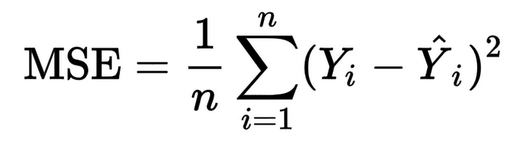

where n is the number of samples and the summation is over all samples.

The MSE is a continuous, positive, and squared value, so it is always non-negative and the smaller the MSE, the better the model's predictions.

Below we define a function for the MSE that returns the sum of the overall difference between the predicted and the actual values of the Weibull distribution. The minimize function is called with the ``fun`` parameter being the ``MSE`` function. The tuple attribute represents the initial guess for better convergence.

In [29]:
def MSE(values, x, y):
    # minimize the mean-squared error (MSE)
    return ((y-weibull_function(x, *values)) **2).sum()

# prepare features
X = df1["wind_speed"]
y = df1["probability"]

m1 = minimize(MSE, [1, 2], args=(X, y)) 
print(m1)

      fun: 9.756832434611998e-08
 hess_inv: array([[ 45.589547  , -20.93939581],
       [-20.93939581, 705.57807822]])
      jac: array([ 8.11549789e-07, -3.22980246e-06])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 27
     njev: 36
   status: 0
  success: True
        x: array([ 2.00154379, 11.3407152 ])


In [30]:
print(f"The k value for this Weibull distribution is: {m1.x[0]}")
print(f"The c value for this Weibull distribution is: {m1.x[1]}")

The k value for this Weibull distribution is: 2.0015437867810455
The c value for this Weibull distribution is: 11.340715195914363


We can now observe a change in the parameters of the distributions of the remaining data. The mean values have remained fairly equal for the `Axis` and `Feed` columns but it has improved considerably for the `Path` column. In terms of the standard deviation, all three have been reduced, which means the data is now more densily clustered. We have reduced the size of our dataset from 220 to 218 counts, which doesn't involve a great loss of data.

In [31]:
x = np.arange(0, 33, 0.1)

@interact(k=(-1, 6.0, 0.001), λ=(0, 15, 0.001))
def plot_weibull(k=m1.x[0], λ=m1.x[1]):
    
    weibull = weibull_function(x, k, λ)  # Creating a line using your function and the values given

    plt.plot(x, weibull, '-', color='magenta', linewidth=2, alpha=0.6)
    sns.scatterplot(data=df1, x='wind_speed', y='probability', s=150, color="#90EE90")
    plt.ylim([0, 0.09])
    plt.xlim([-0.5, 33])

interactive(children=(FloatSlider(value=2.0015437867810455, description='k', max=6.0, min=-1.0, step=0.001), F…

In [32]:
X = df2["wind_speed"]
y = df2["probability"]

m2 = minimize(MSE, [1, 2], args=(X, y))  #[1, 2] represents the initial guess!
print(m2)

      fun: 6.635745179758211e-07
 hess_inv: array([[ 30.54766103,  -6.07879751],
       [ -6.07879751, 184.85205185]])
      jac: array([ 5.18422688e-07, -3.38447727e-07])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 14
     njev: 25
   status: 0
  success: True
        x: array([1.98315027, 7.29565941])


In [33]:
print(f"The k value for this Weibull distribution is: {m2.x[0]}")
print(f"The λ value for this Weibull distribution is: {m2.x[1]}")

The k value for this Weibull distribution is: 1.9831502729015662
The λ value for this Weibull distribution is: 7.295659412732497


In [34]:
x = np.arange(0, 33, 0.1)

@interact(k=(-1, 6.0, 0.001), λ=(0, 15, 0.001))
def plot_weibull(k=m2.x[0], λ=m2.x[1]):
    
    weibull = weibull_function(x, k, λ)  # Creating a line using your function and the values given

    plt.plot(x, weibull, '-', color='aqua', linewidth=2, alpha=0.5)
    sns.scatterplot(data=df2, x='wind_speed', y='probability', s=150, color="#FFA500")
    plt.ylim([0, 0.12])
    plt.xlim([-0.5, 33])

interactive(children=(FloatSlider(value=1.9831502729015662, description='k', max=6.0, min=-1.0, step=0.001), F…

### 5.3 Classification of the datasets

Dataset 1:
Onshore wind distributions typically have higher wind speeds compared to offshore wind distributions. The shape parameter of the Weibull distribution of an onshore wind distribution tends to be larger than 1, which indicates that the wind speed frequency distribution is more spread out and has a longer tail. The scale parameter is also larger, indicating higher average wind speeds. The location parameter is relatively low, indicating that the minimum wind speed is not as low as it would be in an offshore wind distribution.

Dataset 2:
Offshore wind distributions tend to have lower wind speeds compared to onshore wind distributions. The shape parameter of the Weibull distribution of an offshore wind distribution tends to be smaller than 1, which indicates that the wind speed frequency distribution is more concentrated and has a shorter tail. The scale parameter is also smaller, indicating lower average wind speeds. The location parameter is relatively high, indicating that the minimum wind speed is higher than it would be in an onshore wind distribution.

In conclusion, the Weibull parameters of a wind distribution provide important information about the wind speeds at a particular location and help determine the most suitable wind turbine for that location. An onshore wind distribution would require a wind turbine with a larger rotor and a taller tower, while an offshore wind distribution would require a wind turbine with a smaller rotor and a shorter tower.

## 6. Power curve

A power curve is a graph that shows the relationship between the wind speed and the power output of a wind turbine. The power curve is an important tool for understanding the performance of a wind turbine and for designing and operating wind farms.

The power curve of a wind turbine typically shows how the power output of the turbine increases with increasing wind speed. The power output of a wind turbine is limited by the size of the turbine and the efficiency of its blades, so the power curve will typically reach a maximum value at some point and then plateau. The shape of the power curve depends on the design of the wind turbine and the characteristics of the wind resource at the site where the turbine is located. Wind turbines are designed to operate at a specific range of wind speeds, and the power curve will typically be steeper in the middle of this range, where the wind speeds are optimal for power production.

The power curve is an important tool for wind turbine designers, operators, and regulators, as it provides information about the performance of the turbine and helps to ensure that it is operating efficiently and safely. It is also an important factor to consider when siting and designing wind farms, as it helps to determine the overall power output of the wind farm and the land area required to support it.

### 6.1 Wind turbine model

The [Alstom ECO 110](https://en.wind-turbine-models.com/turbines/792-alstom-eco-110) is a wind turbine with a rated power of 3 megawatts (MW). It is a horizontal axis wind turbine (HAWT) designed for large wind farms. This turbine is equipped with advanced technology and features to optimize energy production and increase its efficiency. The Alstom ECO 110 has a rotor diameter of 110 meters and a hub height of 80 meters, making it capable of capturing wind from a large area. Additionally, it features a modular design that allows for quick and easy maintenance, reducing downtime and increasing the overall productivity of the wind farm. The Alstom ECO 110 is a reliable and efficient wind turbine, making it a popular choice for many wind energy projects.

We proceed to create a power curve of a wind turbine based on the wind speed data stored in the dataframe ``df1``. The code iterates through the wind speeds stored in the column ``wind_speed`` and calculates the power output of the wind turbine at each wind speed. The resulting power values are stored in the ``power`` column of the dataframe and can be used to graph the power curve of the wind turbine.

In [35]:
df1["power"] = 0

In [36]:
for s in df1["wind_speed"]:
    
    if (s >= 3) & (s <= 12):
        df1["power"][s] = ((1000 / 3) * s - 1000)
        
    elif (s > 12) & (s <= 25):
        df1["power"][s] = 3000
        
    else:
        df1["power"][s] = 0

<ipython-input-36-3f2d0ded3c81>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["power"][s] = 0
<ipython-input-36-3f2d0ded3c81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["power"][s] = ((1000 / 3) * s - 1000)


### 6.2 Plotting of the wind curve 

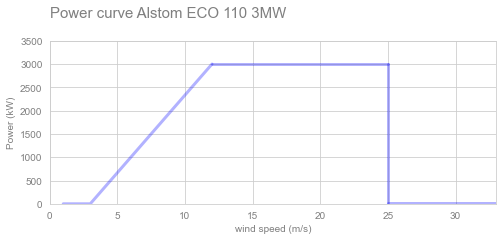

In [37]:
fig, ax = plt.subplots(figsize=(8,3))
plt.ylim(0, 3500)
plt.xlim(0, 33)
ax.axvline(x = 25, color = 'b', alpha=0.3, linewidth=3, ymin=0, ymax=3000/3500)
ax.axhline(y = 3000, color = 'b', alpha=0.3, linewidth=3, xmin=12/33, xmax=25/33)
ax.axhline(y = 10, color = 'b', alpha=0.3, linewidth=3, xmin=25/33, xmax=1)
ax.plot(df1['wind_speed'][:12], df1['power'][:12],
            color='b', alpha=0.3, linewidth = 3)

ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.text(x=0, y=4000,
        s='Power curve Alstom ECO 110 3MW',
        weight='normal', color= "grey",size=15)

ax.set_xlabel("wind speed (m/s)", color="grey")
ax.set_ylabel("Power (kW)", color="grey")
plt.show()

### 6.3 Energy yield per annum

We conduct a simple product calculation in order to calculate the yearly energy generation and we store in a new column.

In [38]:
df1["energy"] = df1["power"] * df1["annual_h"]/1000
df1.head(13)

,annual_h,wind_speed,probability,power,energy
1,134.99,1,0.015434,0.000000,0.000000
2,263.76,2,0.030157,0.000000,0.000000
3,380.58,3,0.043514,0.000000,0.000000
4,480.59,4,0.054948,333.333333,160.196667
5,560.19,5,0.064049,666.666667,373.460000
6,617.19,6,0.070566,1000.000000,617.190000
7,650.92,7,0.074423,1333.333333,867.893333
8,662.12,8,0.075703,1666.666667,1103.533333
9,652.77,9,0.074634,2000.000000,1305.540000
10,625.81,10,0.071552,2333.333333,1460.223333


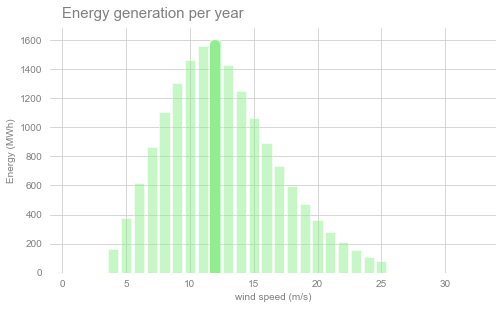

In [63]:
fig, ax = plt.subplots(figsize=(8,4.5))
ax.bar(df1['wind_speed'],
        df1['energy'],
        color='#90EE90', alpha = 0.5)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.axvline(x = 12, color = '#90EE90', alpha=1, linewidth=10, ymin=0, ymax=df1["probability"][7]*10/0.8)
    
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.text(x=0, y=1750,
        s='Energy generation per year',
        weight='normal', size=15, color="grey")

ax.set_xlabel("wind speed (m/s)", color="grey")
ax.set_ylabel("Energy (MWh)", color="grey")
plt.show()

In conclusion, the wind turbine model Alstom ECO 110 may not be the best choice for the data gathered on the dataframe 1 ``df1``, even though its Weibull distribution parameters match the data. The maximum energy generation range for the Alstom ECO 110 is between 12 and 25 m/s, but the average speed of the wind data is located around 8 m/s, which is outside of the optimal range for the model. This means that the Alstom ECO 110 may not be able to generate energy in the most efficient way at the average wind speeds present in the data, which is an important consideration when selecting a wind turbine model. As such, it may be necessary to consider alternative wind turbine models that better fit the wind data, in order to maximize the energy generation output and thus the overall efficiency.